# K-means Clustering

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np

## Batch version

In [3]:
X = np.loadtxt("cluster.dat")
X

array([[ 2.195194,  0.652289,  1.029164, -1.095304,  1.97286 , -0.887429,
         2.088042, -2.589351, -2.300691, -0.827774, -1.317564,  1.471342,
         0.918325, -0.719561,  2.334556, -0.660512,  1.333535, -1.691402,
         0.829857, -0.762891, -1.911958,  1.13851 , -1.190476, -0.665444,
        -0.484931, -1.719561,  1.919842, -0.789357,  1.039614, -1.738792,
         1.084405, -1.439062, -1.300691, -1.589351, -1.992342,  1.773761,
        -2.092596, -1.972662, -1.52992 , -0.126445,  2.267281, -1.170143,
         1.112571, -1.188092,  1.013987,  1.403012,  1.027338, -2.0887  ,
        -1.714338, -2.030594, -0.579394, -0.931202, -2.188092, -2.464858,
        -0.691402, -1.441815, -1.660512, -2.081566,  1.848275, -1.395959,
        -1.751433, -2.095304, -0.93435 ,  1.334556, -1.226239, -1.081566,
        -2.246265,  1.682436, -1.097373, -1.533405,  1.866744, -2.408764,
        -0.693134,  2.459381,  1.9113  , -1.463061, -1.852043,  2.147957,
        -0.993156,  0.9113  , -1.36146

In [4]:
import numpy as np

Ms = np.arange(2, 9)

### Initialization

In [5]:
from lib.k_means import initialize_prototypes
    
initialize_prototypes(X, 4)

array([[ 0.21700171,  0.50331006, -1.60930831,  1.09660103],
       [-0.0839038 , -0.4058897 ,  0.27218146,  0.53439112]])

In [6]:
t_max = 5

### Optimization

In [7]:
def initialize_m(M, p):
    m = np.zeros((M, p))
    return m

initialize_m(3, X.shape[1])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
from lib.k_means import dist

In [9]:
def assign_points_to_prototypes(X, w):
    M = w.shape[1]
    p = X.shape[1]
    m = initialize_m(M, p)
    for i in np.arange(p):
        x = X[:,i]
        distances = [dist(w_q, x) for w_q in w.T]
        min_w = np.argmin(distances)
        m[min_w,i] = 1
    return m

In [10]:
def update_prototypes(X, m):
    M, p = m.shape
    
    clusters = [[] for i in np.arange(M)]
    for i in np.arange(p):
        x = X[:,i]
        w_assigned = np.where(m[:,i] == 1)[0][0]
        clusters[w_assigned].append(x)
    clusters = np.array(clusters)
    
    w = np.array([np.sum(c, axis=0) / len(c) for c in clusters]).T
    
    return w

In [11]:
def E(X, m, w):
    p = X.shape[1]
    M = w.shape[1]
    sum = 0
    for q in np.arange(M):
        for i in np.arange(p):
            w_q = w[:,q]
            x = X[:,i]
            sum += m[q, i] * dist(w_q, x)**2
    return sum / p

In [12]:
import matplotlib.pyplot as plt
import math

def k_means_batch(X, M, t_max=t_max):
    N, p = X.shape
    w = initialize_prototypes(X=X, M=M)
    w_history = []
    e_history = []
    for t in np.arange(t_max):
        m = assign_points_to_prototypes(X, w)
        w = update_prototypes(X, m)
        w_history.append(w)
        e_history.append(E(X, m, w))
    return m, w_history, e_history

### Visualization

In [13]:
def visualize_k_means(X, w_history):
    t_max = len(w_history)
    nrows = math.ceil(t_max / 5)
    fig, axes = plt.subplots(nrows=nrows, ncols=5, figsize=(15, 6)) 
    
    for t in np.arange(t_max):
        ax = axes.flat[t]
        w = w_history[t]
        ax.scatter(x=X[0], y=X[1])
        ax.scatter(x=w[0], y=w[1])

In [14]:
def visualize_cost_function(e_histories):
    fig, ax = plt.subplots(figsize=(12, 6))
    for e_history in e_histories:
        x = np.arange(len(e_history))
        ax.plot(x, e_history)

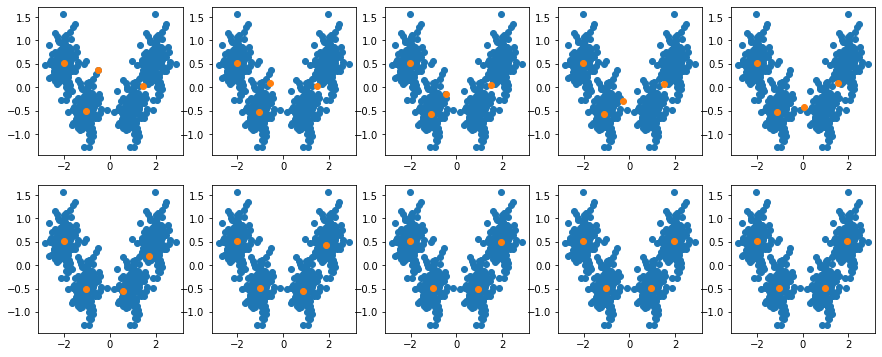

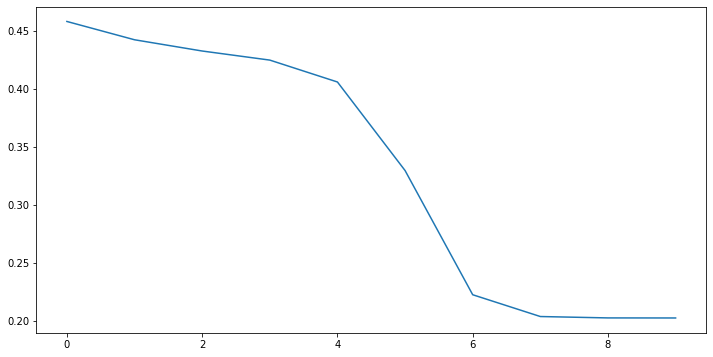

In [15]:
m, w_history, e_history = k_means_batch(X, 4, t_max=10)
visualize_k_means(X, w_history)
visualize_cost_function([e_history])

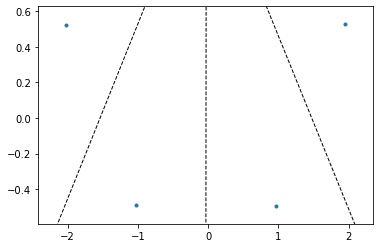

In [16]:
from scipy.spatial import Voronoi, voronoi_plot_2d
w = w_history[-1]
vor = Voronoi(w.T)

fig = voronoi_plot_2d(vor)